/tmp/ipykernel_102415/1074004674.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('data/visitors.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            pageviews
date                 
2011-04-19        764
2011-04-25       1308
2011-05-02       1219
2011-05-09        777
2011-05-16       1098


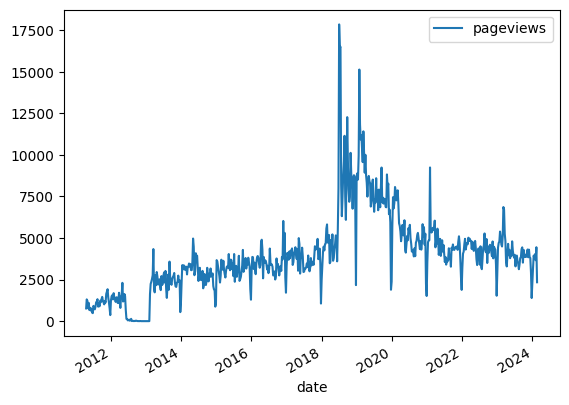

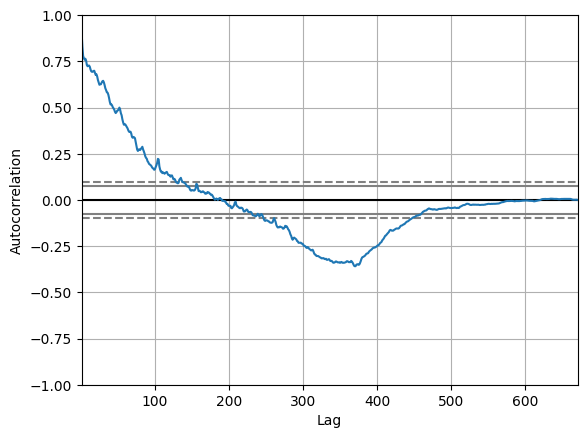

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
 
def parser(x):
 return datetime.strptime(x, '%Y-%m-%d')
 
series = pd.read_csv('data/visitors.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()
pd.plotting.autocorrelation_plot(series)
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:              pageviews   No. Observations:                  671
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5559.355
Date:                Thu, 22 Feb 2024   AIC                          11130.710
Time:                        09:20:09   BIC                          11157.753
Sample:                    04-24-2011   HQIC                         11141.185
                         - 02-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2033      0.021     -9.610      0.000      -0.245      -0.162
ar.L2         -0.2456      0.024    -10.182      0.000      -0.293      -0.198
ar.L3         -0.2980      0.017    -17.553      0.0

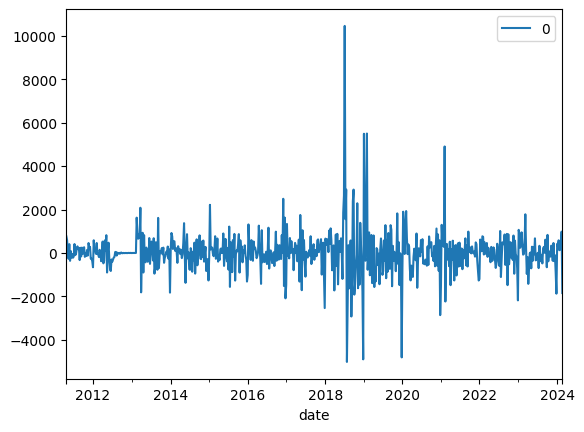

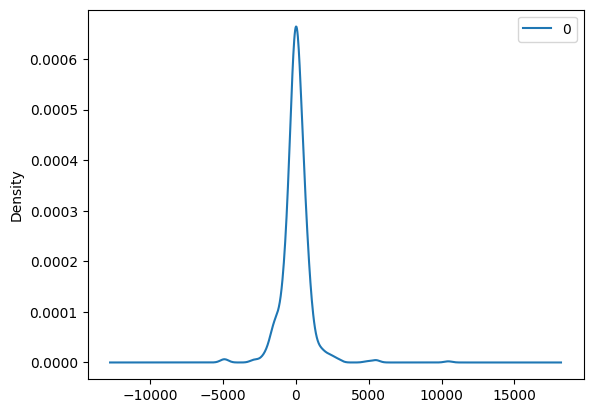

                  0
count    671.000000
mean       8.922666
std      971.432222
min    -5018.600743
25%     -353.748615
50%        0.239750
75%      384.370614
max    10456.864708


In [2]:
series.index = series.index.to_period('W')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=7376.212493, expected=7066.000000
predicted=7377.029496, expected=7361.000000
predicted=7408.461198, expected=7321.000000
predicted=7708.089953, expected=6872.000000
predicted=6881.593449, expected=6843.000000
predicted=6992.541059, expected=8819.000000
predicted=8520.325911, expected=8012.000000
predicted=7766.566880, expected=8265.000000
predicted=7832.364224, expected=6432.000000
predicted=6730.748755, expected=6702.000000
predicted=6792.821007, expected=5949.000000
predicted=6775.671591, expected=1887.000000
predicted=3033.993864, expected=2377.000000
predicted=3773.892915, expected=5701.000000
predicted=6317.274651, expected=7448.000000
predicted=6836.485651, expected=6779.000000
predicted=5993.870210, expected=7102.000000
predicted=6047.620615, expected=8063.000000
predicted=7181.180588, expected=7832.000000
predicted=7309.809447, expected=7260.000000
predicted=7190.566992, expected=7621.000000
predicted=7589.020524, expected=7862.000000
predicted=7770.398383, expected=

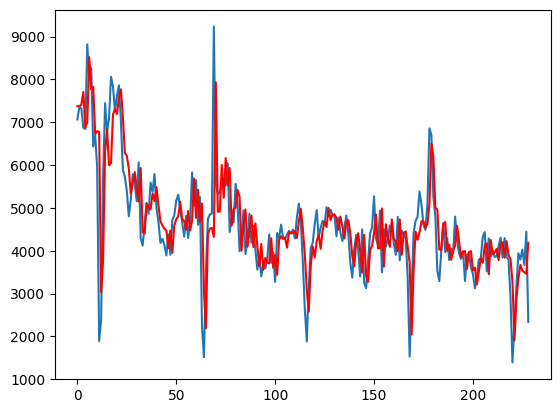

In [3]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()